In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [18]:
train_data = pd.read_csv(r"C:\Users\agnie\OneDrive\Pulpit\training.csv", sep='\t')
validation_data = pd.read_csv(r"C:\Users\agnie\OneDrive\Pulpit\validation.csv", sep='\t')

In [61]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26056 entries, 0 to 29730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DepartureDate     26056 non-null  object 
 1   DepartureYear     26056 non-null  int64  
 2   DepartureMonth    26056 non-null  int64  
 3   DepartureDay      26056 non-null  int64  
 4   FlightNumber      26056 non-null  int64  
 5   DepartureAirport  26056 non-null  object 
 6   ArrivalAirport    26056 non-null  object 
 7   Route             26056 non-null  object 
 8   ActualFlightTime  26056 non-null  int64  
 9   ActualTotalFuel   26056 non-null  float64
 10  ActualTOW         26056 non-null  float64
 11  FLownPassengers   26056 non-null  float64
 12  BagsCount         26056 non-null  float64
 13  FlightBagsWeight  26056 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 3.0+ MB
None


In [63]:
print(validation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DepartureDate     1878 non-null   object 
 1   DepartureYear     1878 non-null   int64  
 2   DepartureMonth    1878 non-null   int64  
 3   DepartureDay      1878 non-null   int64  
 4   FlightNumber      1878 non-null   int64  
 5   DepartureAirport  1878 non-null   object 
 6   ArrivalAirport    1878 non-null   object 
 7   Route             1878 non-null   object 
 8   ActualFlightTime  1878 non-null   int64  
 9   ActualTotalFuel   1878 non-null   float64
 10  FLownPassengers   1878 non-null   float64
 11  BagsCount         1878 non-null   float64
 12  FlightBagsWeight  1878 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 190.9+ KB
None


In [59]:
print(train_data.describe())


       DepartureYear  DepartureMonth  DepartureDay  FlightNumber  \
count        26056.0         26056.0  26056.000000  26056.000000   
mean          2016.0            10.0      8.005028   4897.953293   
std              0.0             0.0      4.338818   3040.340377   
min           2016.0            10.0      1.000000      1.000000   
25%           2016.0            10.0      4.000000   2163.000000   
50%           2016.0            10.0      8.000000   4855.000000   
75%           2016.0            10.0     12.000000   7624.000000   
max           2016.0            10.0     15.000000   9998.000000   

       ActualFlightTime  ActualTotalFuel     ActualTOW  FLownPassengers  \
count      26056.000000     2.605600e+04  26056.000000     2.605600e+04   
mean         110.179306    -2.312482e-16  65437.341188    -1.798786e-16   
std           50.721185     1.000019e+00   2550.274673     1.000019e+00   
min            2.000000    -2.084172e+00  57794.000000    -2.970191e+00   
25%         

In [64]:
print(validation_data.describe())

       DepartureYear  DepartureMonth  DepartureDay  FlightNumber  \
count         1878.0          1878.0        1878.0   1878.000000   
mean          2016.0            11.0           1.0   4673.227370   
std              0.0             0.0           0.0   3069.845977   
min           2016.0            11.0           1.0     11.000000   
25%           2016.0            11.0           1.0   1995.250000   
50%           2016.0            11.0           1.0   4566.500000   
75%           2016.0            11.0           1.0   7452.750000   
max           2016.0            11.0           1.0   9995.000000   

       ActualFlightTime  ActualTotalFuel  FLownPassengers    BagsCount  \
count       1878.000000      1878.000000      1878.000000  1878.000000   
mean         110.446219        -0.046216        -0.579132    35.780618   
std           51.150847         1.058363         2.608275    22.758626   
min            7.000000        -1.890033       -16.440327     2.000000   
25%           72.

In [21]:
# Zamiana wartości w wybranych kolumnach na liczby 

columns_to_convert_1 = ['DepartureYear', 'DepartureMonth', 'DepartureDay', 
                      'FlightNumber', 'ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 
                      'FLownPassengers', 'BagsCount', 'FlightBagsWeight']
train_data[columns_to_convert_1] = train_data[columns_to_convert_1].apply(pd.to_numeric, errors='coerce')

train_data.head()

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
0,01/10/2016,2016,10,1,1145,MAN,SXF,MAN-SXF,91,3660,64016.0,175.0,61.0,440.0
1,01/10/2016,2016,10,1,1160,CTA,FCO,CTA-FCO,68,3280,66138.0,182.0,27.0,350.0
2,01/10/2016,2016,10,1,1183,LGW,SNN,LGW-SNN,64,2720,58447.0,127.0,NaN,NaN
3,01/10/2016,2016,10,1,1220,ATH,CHQ,ATH-CHQ,35,1682,60587.0,163.0,12.0,150.0
4,01/10/2016,2016,10,1,1225,CHQ,ATH,CHQ-ATH,34,1877,63090.0,178.0,37.0,490.0


In [22]:
columns_to_convert_2 = ['DepartureYear', 'DepartureMonth', 'DepartureDay', 
                      'FlightNumber', 'ActualFlightTime', 'ActualTotalFuel', 
                      'FLownPassengers', 'BagsCount', 'FlightBagsWeight']
validation_data[columns_to_convert_2] = validation_data[columns_to_convert_2].apply(pd.to_numeric, errors='coerce')

validation_data.head()

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,FLownPassengers,BagsCount,FlightBagsWeight
0,01/11/2016,2016,11,1,6003,MRS,BES,MRS-BES,84,3630,185.0,43.0,560.0
1,01/11/2016,2016,11,1,6004,BES,MRS,BES-MRS,86,3690,188.0,NaN,NaN
2,01/11/2016,2016,11,1,6542,MRS,STN,MRS-STN,100,4390,168.0,55.0,720.0
3,01/11/2016,2016,11,1,6541,STN,MRS,STN-MRS,100,4690,185.0,35.0,460.0
4,01/11/2016,2016,11,1,5542,STN,REU,STN-REU,112,4900,167.0,31.0,400.0


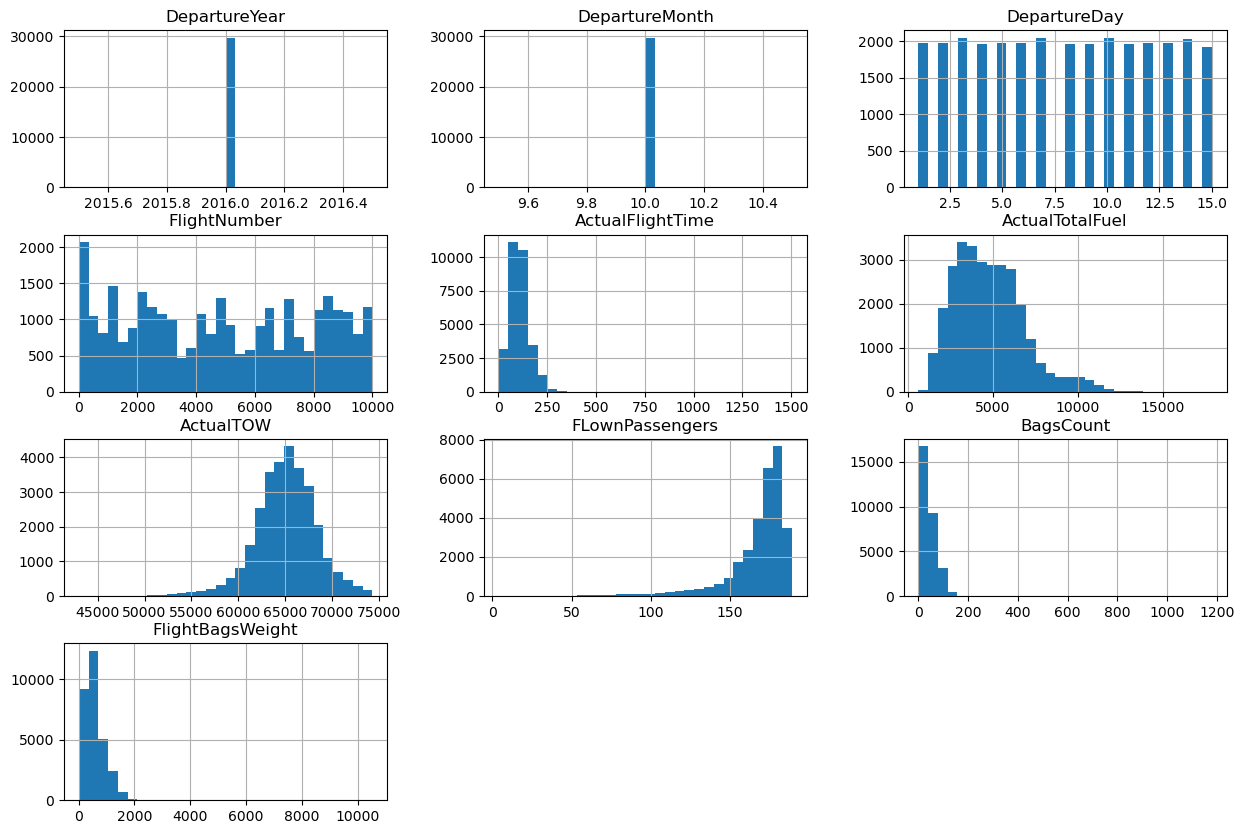

In [38]:
# Rozkład zmiennych liczbowych

train_data.hist(bins=30, figsize=(15, 10))
plt.show()

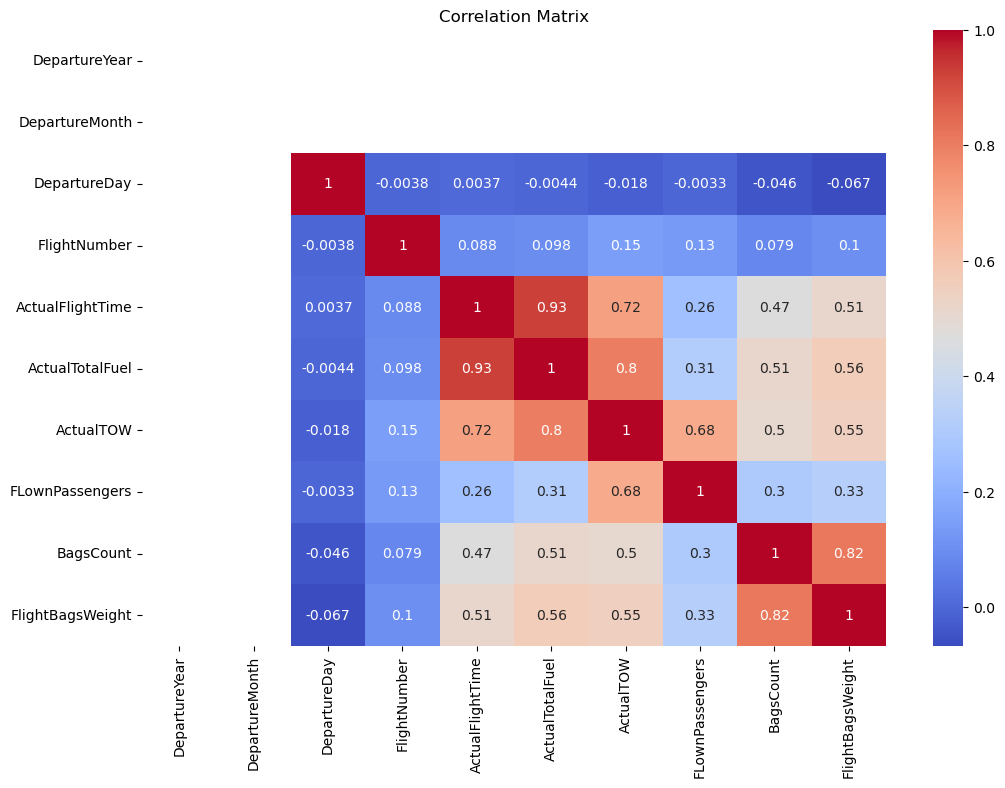

In [44]:
# Korelacja między zmiennymi

correlation = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Zastąpienie brakujących danych medianą 

train_data.fillna(train_data.median(), inplace=True)
validation_data.fillna(validation_data.median(), inplace=True)

train_data.head()

C:\Users\agnie\AppData\Local\Temp\ipykernel_9352\1715483359.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.fillna(train_data.median(), inplace=True)
C:\Users\agnie\AppData\Local\Temp\ipykernel_9352\1715483359.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  validation_data.fillna(validation_data.median(), inplace=True)


,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
0,01/10/2016,2016,10,1,1145,MAN,SXF,MAN-SXF,91,3660,64016.0,175.0,61.0,440.0
1,01/10/2016,2016,10,1,1160,CTA,FCO,CTA-FCO,68,3280,66138.0,182.0,27.0,350.0
2,01/10/2016,2016,10,1,1183,LGW,SNN,LGW-SNN,64,2720,58447.0,127.0,39.0,490.0
3,01/10/2016,2016,10,1,1220,ATH,CHQ,ATH-CHQ,35,1682,60587.0,163.0,12.0,150.0
4,01/10/2016,2016,10,1,1225,CHQ,ATH,CHQ-ATH,34,1877,63090.0,178.0,37.0,490.0


In [28]:
print(train_data.isnull().sum())
print(validation_data.isnull().sum())

DepartureDate       0
DepartureYear       0
DepartureMonth      0
DepartureDay        0
FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
Route               0
ActualFlightTime    0
ActualTotalFuel     0
ActualTOW           0
FLownPassengers     0
BagsCount           0
FlightBagsWeight    0
dtype: int64
DepartureDate       0
DepartureYear       0
DepartureMonth      0
DepartureDay        0
FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
Route               0
ActualFlightTime    0
ActualTotalFuel     0
FLownPassengers     0
BagsCount           0
FlightBagsWeight    0
dtype: int64


In [47]:
# Funkcja do identyfikacji i usuwania wartości odstających

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_index = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index
    df.drop(outliers_index, inplace=True)
    return df

In [48]:
# Usunięcie wartości odstających w danych treningowych

columns_to_check = ['ActualTOW', 'FLownPassengers', 'BagsCount', 'FlightBagsWeight']
for column in columns_to_check:
    train_data = remove_outliers(train_data, column)

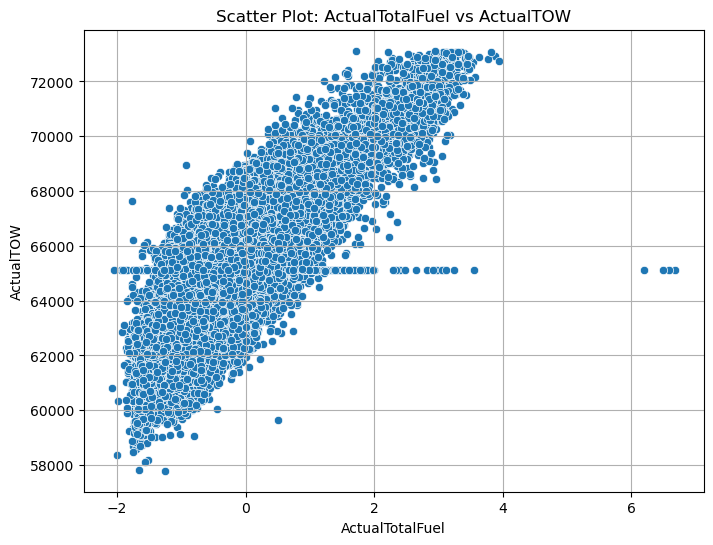

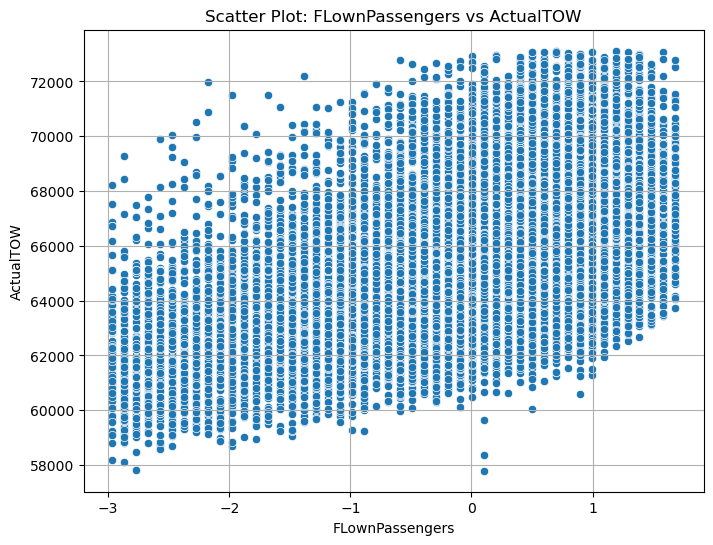

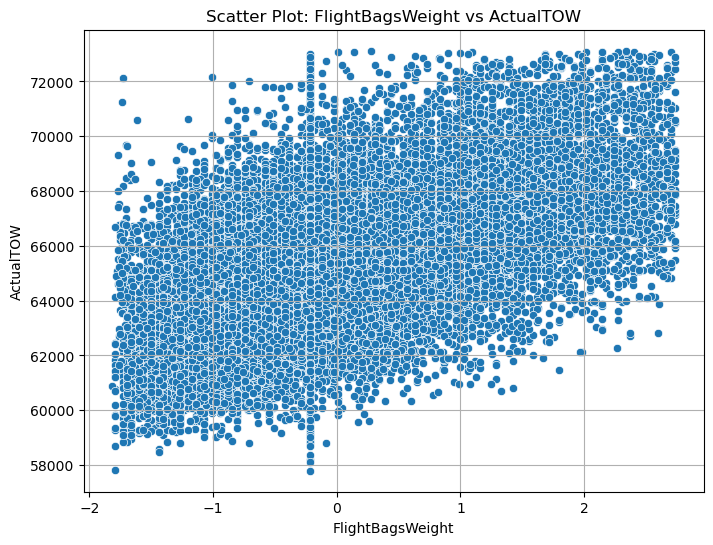

In [49]:
# Normalizacja danych

scaler = StandardScaler()
columns_to_normalize = ['ActualTotalFuel', 'FLownPassengers', 'FlightBagsWeight']
train_data[columns_to_normalize] = scaler.fit_transform(train_data[columns_to_normalize])
validation_data[columns_to_normalize] = scaler.transform(validation_data[columns_to_normalize])


variables = ['ActualTotalFuel', 'FLownPassengers', 'FlightBagsWeight']

# Wykresy punktowe

for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='ActualTOW', data=train_data)
    plt.title(f'Scatter Plot: {var} vs ActualTOW')
    plt.xlabel(var)
    plt.ylabel('ActualTOW')
    plt.grid(True)
    plt.show()




In [50]:
# Obliczanie korelacji między TOW a innymi zmiennymi

correlation = train_data[variables + ['ActualTOW']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                  ActualTotalFuel  FLownPassengers  FlightBagsWeight  \
ActualTotalFuel          1.000000         0.280563          0.561644   
FLownPassengers          0.280563         1.000000          0.286728   
FlightBagsWeight         0.561644         0.286728          1.000000   
ActualTOW                0.864347         0.527188          0.556606   

                  ActualTOW  
ActualTotalFuel    0.864347  
FLownPassengers    0.527188  
FlightBagsWeight   0.556606  
ActualTOW          1.000000  


In [53]:
X = train_data[['ActualTotalFuel', 'FLownPassengers', 'FlightBagsWeight']]
y = train_data['ActualTOW']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model regresji liniowej

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
print("RMSE dla regresji liniowej:", rmse_linear)

RMSE dla regresji liniowej: 1015.0364494658272


In [56]:
# Model Random Forest

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 1080.7306918837298


In [57]:
# Grid Search dla Random Forest

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)
print("Best Random Forest RMSE:", rmse_best_rf)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Random Forest RMSE: 1007.5614302349079


In [67]:
# Zapisanie wyników predykcji do pliku CSV

validation_predictions = grid_search.predict(validation_data[['ActualTotalFuel', 'FLownPassengers', 'FlightBagsWeight']])

validation_data['PredictedTOW'] = validation_predictions
validation_data.to_csv("validation_predictions.csv", columns=['PredictedTOW'], index=False)